In [8]:
import os
import gc
import re
import time
import random
import numpy as np
import csv
import copy
import glob
import math
import joblib
import torch
import torch.nn as nn
from torch.optim import AdamW
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from transformers import BertTokenizer, VisualBertForQuestionAnswering, VisualBertConfig
import scipy
from scipy.stats import mannwhitneyu
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter
from scipy.interpolate import CubicSpline, interp1d
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve, classification_report, top_k_accuracy_score, coverage_error
import warnings
warnings.filterwarnings("ignore")


def load_plt_setting():
    plt.style.use('seaborn-v0_8-white')
    mpl.rcParams['font.sans-serif'] = "Arial"
    mpl.rcParams['font.family'] = "sans-serif"
    mpl.rcParams['axes.linewidth'] = 2
    font = {'size': 32}
    mpl.rc('font', **font)
    mpl.rcParams['xtick.major.pad']='8'
    mpl.rcParams['ytick.major.pad']='8'
    plt.rcParams["font.weight"] = "normal"
    plt.rcParams["axes.labelweight"] = "normal"
    plt.rcParams['svg.fonttype'] = 'none'
    mpl.rcParams['axes.linewidth'] = 2

tokenizer = BertTokenizer.from_pretrained("google-bert/bert-base-uncased")

In [28]:
import pandas as pd
train_loss = pd.read_csv("/Users/shengfang/Desktop/X.051/train_loss.csv")
val_loss = pd.read_csv("/Users/shengfang/Desktop/X.051/val_loss.csv")
print(train_loss.shape)

(4000, 1)


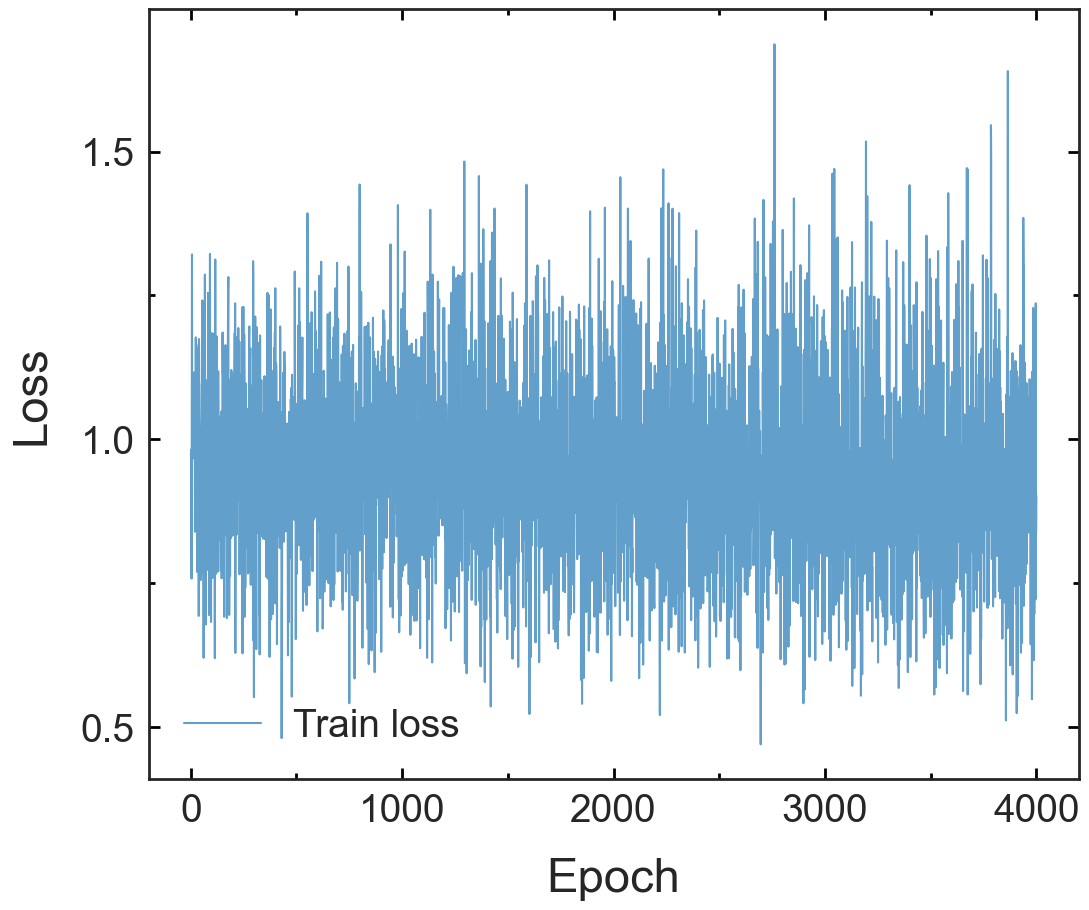

In [30]:
load_plt_setting()
epoch = np.arange(1,4001,1)
fig, ax = plt.subplots(figsize=(12, 10))

ax.plot(epoch, train_loss, alpha=0.7, label='Train loss')
# ax.plot(epoch, val_loss, label='Val loss')

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, steps=[1, 2, 5, 10]))
ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, steps=[1, 2, 5, 10]))
ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax.tick_params(axis='both',direction='in',length=8,width=2,pad=10,color='black',right='on',top='on',labelsize=28)
ax.tick_params(axis='both',which='minor',direction='in',length=4,width=2,pad=10,color='black',right='on',top='on',labelsize=28)

# ax.axes.set_xlim([0,30000000])
# ax.axes.set_ylim([0,0.015])

# ax.set_xscale('log')

ax.set_xlabel(r'Epoch', labelpad=20, fontsize=34)
ax.set_ylabel(r'Loss', labelpad=20, fontsize=34)
# plt.legend(loc="upper right",fontsize=28)
plt.legend(loc="lower left",fontsize=28)